#Abstract
This study considers computations of integrals by the following two methods: trapezoidal rule and Romberg integration method. The comparison of these two integral computations was based on exact value of integral, precision (difference between exact value of integral and computed ones), and computational cost. Cost of computation was measured as execution time. Plot 'Computational cost VS Precision' is provided where we can see the comparison between the methods. While trapezoidal rule is efficient in computational cost, it provides less precise results. On the other hand, Romberg method's execution time is greater and it estimates closer to the exact value of integral.

#Introduction
Integral that is solved in this assignment is below:
$$ I = \int_0^1 e^{-x} dx. $$
The purpose of this small research is to determine which of the methods: trapezoidal rule or Romberg method gives smallest error for the same computational cost. My hypothesis is that Rumberg's method takes more execution time. In <i>Methodology</i> part, formulas of each method are shown and described in details. Then formulas are constructed in code to solve the integral. Outcomes of the solutions are provided in <i>Results</i> part. Summary of the main points is shown in <i>Conclusion</i>. 

#Methodology


Trapezoidal rule approximates the region under the function as the sum of numerous trapezoids. The following formula is used in computations:
$$\int f(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1}) + f(x_k)}{2} \triangle x_k$$
where $$\triangle x_k = x_k - x_{k-1}$$
<center><img src = 'https://www.researchgate.net/profile/Nour-Moustafa/publication/317558878/figure/fig5/AS:669621539590159@1536661624308/Composite-trapezoidal-rule.png' width = 300 height = 150></center>



Romberg's method uses trapezoidal rule and extrapolates it by evaluating the integrand at equally spaced points. The formula is shown below:
$$R(i,j) = \frac{4^j \cdot R(i, j-1) - R(i-1, j-1)}{4^j -1} $$
where $i \geq j$ and $j \geq 1$ and $R[i,0]$ is equal to trapezoidal rule having $2^i$ equally spaced points
<center><img src = 'https://miro.medium.com/max/1400/1*UfN9jeY-NN6niP2Rl7rDWw.png' width = 400 height = 150></center>

###Trapezoidal rule

In [ ]:
import numpy as np
def func(x):
  return np.e**(-x)
def trapezoidal(a,b,n):
  h = (b-a)/n #n - number of equally spaced points
  s = (func(a) + func(b))/2
  for i in range(1,n):
    s = s + func(a + i*h)
  return h*s

###Romberg integration

In [ ]:
def romberg(a,b,r):
  R = np.zeros((r,r)) #r - number of rows
  for i in range(0,r):
    R[i,0] = trapezoidal(a,b,2**i)
    for j in range(0,i):
      R[i,j+1] = (4**(j+1) * R[i,j] - R[i-1, j]) / (4**(j+1) - 1)
  return R[r-1,r-1]

###Exact value of integration and comparisons

In [ ]:
exact = 1 - 1/np.e
print('exact -', exact)
print('trapezoidal -', trapezoidal(0,1,100))
print('romberg -', romberg(0,1,10))

exact - 0.6321205588285577
trapezoidal - 0.6321258264911017
romberg - 0.6321205588285571


#Results
###Plot 'Computational cost VS Precision'

In [ ]:
import timeit
cost_time_trapezoidal = [timeit.timeit(lambda: trapezoidal(0,1,100), number = i) for i in range(200,1200,100)]
precision_trapezoidal = [round(trapezoidal(0,1,i-2) - exact, i) for i in range(3,13)]

In [ ]:
precision_trapezoidal

[0.052,
 0.0131,
 0.00584,
 0.003289,
 0.0021057,
 0.00146257,
 0.001074669,
 0.0008228594,
 0.00065019602,
 0.000526679359]

In [ ]:
np.log(precision_trapezoidal)

array([-2.95651156, -4.33514305, -5.14302448, -5.71717171, -6.16310733,
       -6.52756012, -6.83574257, -7.10272521, -7.33823667, -7.54891862])

In [ ]:
cost_time_romberg = [timeit.timeit(lambda: romberg(0,1,6), number = i) for i in range(200,1200,100)]
precision_romberg = [round(romberg(0,1,i-2) - exact, i) for i in range(3,13)]

In [ ]:
np.log(precision_romberg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([-2.95651156, -8.51719319,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


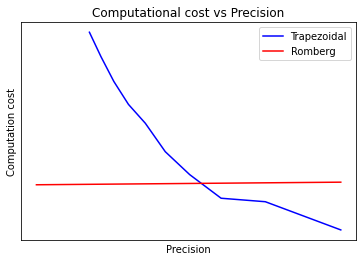

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.log(precision_trapezoidal), cost_time_trapezoidal, label = 'Trapezoidal', color = 'blue')
plt.plot(np.log(precision_romberg), cost_time_romberg, label = 'Romberg', color = 'red')
plt.legend()
plt.title('Computational cost vs Precision')
plt.ylabel('Computation cost')
plt.xlabel('Precision')
plt.xticks([])
plt.yticks([])
plt.show()

As we can see from the plot Romberg integration method costs much in time but provides much higher precision. It is understandable because Romberg integration has not only 2 loops but also depends on Trapezoidal Rule; all of these computations take much time while Trapezoidal rule has only one loop. Though Romberg method being inefficient from the view of execution time it gives much more precise results. 
Also, we can deduce which method costs more in time by looking at corresponding formulas. Firstly, Romberg's integration uses trapezoidal rule, meaning that at this stage both methods already have similar computational cost, secondly, Romberg's method has to extrapolate those computations to get more precise results

#Conclusion


The main points of this study is that trapezoidal rule costs less in time but provides more imprecise results compared to the Romberg's method resulting in higher computational cost. It is explained by complexities of each method: $O(n)$ - trapezoidal rule, and $O(2^n)$ - Romberg's method. Comparison of those two methods is important because depending on the situation in which researcher has to decide between Romberg's method and trapezoidal rule he may reasonably choose the method. 

In further studies, it would be wise to construct a numerical solution that is optimal from both points of view: computational cost and precision. Construction of such computational model would depend on the features of trapezoidal rule and Romberg's method. 

#References
[1] A. Yazici, T. Ergenc, I. Atlas, Romberg Integration: A Symbolic Approach with Mathematica. https://www.researchgate.net/journal/Lecture-Notes-in-Computer-Science-0302-9743, 2003